<a href="https://colab.research.google.com/github/gautumsvp7/EnergyGenerationDataset/blob/main/Electricity_gen_1949to2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving US Electricity Net Generation By Energy Source 1949-2016.xlsx to US Electricity Net Generation By Energy Source 1949-2016.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.cluster import KMeans 

import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  


from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_excel(io.BytesIO(uploaded['US Electricity Net Generation By Energy Source 1949-2016.xlsx']),header=0) 
df

,Annual Electricity Net Generation (Million Kilowatthours),1949 Share of Total,1990 Share of Total,2016 Share of Total,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Electricity Net Generation From Coal, All Sectors",0.457414,0.524721,0.304043,135451.320,154519.994,185203.657,195436.666,218846.325,239145.966,301362.698,338503.484,346386.207,344365.781,378424.210,403067.357,421870.669,450249.238,493926.719,526230.019,570925.951,613474.800,630483.363,684904.580,706001.240,704394.479,713102.454,771131.265,847651.470,828432.921,852786.222,944390.993,985218.596,975742.083,1075037.091,1161562.368,1203203.232,1192004.204,1259424.279,1341680.752,1402128.125,1385831.452,1463781.289,1540652.774,1583779.139,1594011.479,1590622.748,1621206.039,1690070.232,1690693.864,1709426.468,1795195.593,1845015.736,1873515.690,1881087.224,1966264.596,1903955.942,1933130.354,1973736.752,1978300.549,2012873.046,1990511.135,2016455.584,1985801.247,1755904.253,1847290.279,1733430.005,1514042.945,1581114.716,1581710.350,1352398.197,1240089.066
1,"Electricity Net Generation From Petroleum, All...",0.096403,0.041629,0.005861,28547.232,33734.288,28712.116,29749.761,38404.449,31520.175,37138.308,35946.772,40499.357,40371.540,46839.719,47986.893,48519.376,48879.536,52001.610,56953.712,64801.224,78926.172,89270.724,104275.833,137847.152,184183.402,220225.423,274295.961,314342.926,300930.537,289094.900,319988.136,358178.822,365060.441,303525.209,245994.189,206420.775,146797.490,144498.593,119807.913,100202.273,136584.867,118492.571,148899.561,164358.520,126460.202,119751.573,100154.163,112788.180,105900.983,74554.065,81411.225,92554.873,128800.173,118060.838,111220.965,124880.221,94567.395,119405.643,121145.057,122225.017,64166.414,65738.978,46242.612,38936.515,37061.013,30182.245,23189.542,27164.444,30231.862,28248.749,23905.706
2,"Electricity Net Generation From Natural Gas, A...",0.124835,0.122708,0.338417,36966.709,44559.159,56615.678,68453.088,79790.975,93688.271,95285.441,104037.208,114212.525,119759.302,146619.391,157969.787,169285.998,184301.293,201602.073,220038.479,221559.434,251151.562,264805.785,304432.723,333278.945,372890.063,374030.784,375747.796,340858.192,320065.088,299778.408,294623.911,305504.859,305390.836,329485.107,346239.900,345777.173,305259.749,274098.458,297393.596,291945.965,248508.433,272620.803,252800.704,352628.866,372765.154,381553.017,404074.372,414926.798,460218.682,496057.945,455055.576,479398.670,531257.104,556396.127,601038.159,639129.119,691005.744,649907.539,710100.017,760960.254,816440.770,896589.791,882980.599,920978.681,987697.234,1013688.929,1225894.175,1124835.560,1126608.958,1333482.110,1380293.217
3,"Electricity Net Generation From Other Gases, A...",NaN,0.003418,0.003187,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7862.418,10382.830,11335.593,13270.237,12955.798,13319.051,13869.951,14355.813,13350.634,13492.230,14125.592,13954.758,9039.473,11462.684,15600.022,15252.431,13464.144,14176.808,13453.354,11706.876,10632.107,11312.787,11566.200,11897.585,12852.937,12021.786,13116.698,13000.050
4,Electricity Net Generation From Nuclear Electr...,0.000000,0.189893,0.197448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.670,164.691,188.101,518.182,1692.149,2269.685,3211.836,3342.743,3656.699,5519.909,7655.214,12528.419,13927.839,21804.448,38104.545,54091.135,83479.463,113975.740,172505.075,191103.531,250883.283,276403.070,255154.623,251115.575,272673.503,282773.248,293677.119,327633.549,383690.727,414038.063,455270.382,526973.047,529354.717,5

In [4]:
mdf =df.fillna(value=0)
mdf

,Annual Electricity Net Generation (Million Kilowatthours),1949 Share of Total,1990 Share of Total,2016 Share of Total,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"Electricity Net Generation From Coal, All Sectors",0.457414,0.524721,0.304043,135451.320,154519.994,185203.657,195436.666,218846.325,239145.966,301362.698,338503.484,346386.207,344365.781,378424.210,403067.357,421870.669,450249.238,493926.719,526230.019,570925.951,613474.800,630483.363,684904.580,706001.240,704394.479,713102.454,771131.265,847651.470,828432.921,852786.222,944390.993,985218.596,975742.083,1075037.091,1161562.368,1203203.232,1192004.204,1259424.279,1341680.752,1402128.125,1385831.452,1463781.289,1540652.774,1583779.139,1594011.479,1590622.748,1621206.039,1690070.232,1690693.864,1709426.468,1795195.593,1845015.736,1873515.690,1881087.224,1966264.596,1903955.942,1933130.354,1973736.752,1978300.549,2012873.046,1990511.135,2016455.584,1985801.247,1755904.253,1847290.279,1733430.005,1514042.945,1581114.716,1581710.350,1352398.197,1240089.066
1,"Electricity Net Generation From Petroleum, All...",0.096403,0.041629,0.005861,28547.232,33734.288,28712.116,29749.761,38404.449,31520.175,37138.308,35946.772,40499.357,40371.540,46839.719,47986.893,48519.376,48879.536,52001.610,56953.712,64801.224,78926.172,89270.724,104275.833,137847.152,184183.402,220225.423,274295.961,314342.926,300930.537,289094.900,319988.136,358178.822,365060.441,303525.209,245994.189,206420.775,146797.490,144498.593,119807.913,100202.273,136584.867,118492.571,148899.561,164358.520,126460.202,119751.573,100154.163,112788.180,105900.983,74554.065,81411.225,92554.873,128800.173,118060.838,111220.965,124880.221,94567.395,119405.643,121145.057,122225.017,64166.414,65738.978,46242.612,38936.515,37061.013,30182.245,23189.542,27164.444,30231.862,28248.749,23905.706
2,"Electricity Net Generation From Natural Gas, A...",0.124835,0.122708,0.338417,36966.709,44559.159,56615.678,68453.088,79790.975,93688.271,95285.441,104037.208,114212.525,119759.302,146619.391,157969.787,169285.998,184301.293,201602.073,220038.479,221559.434,251151.562,264805.785,304432.723,333278.945,372890.063,374030.784,375747.796,340858.192,320065.088,299778.408,294623.911,305504.859,305390.836,329485.107,346239.900,345777.173,305259.749,274098.458,297393.596,291945.965,248508.433,272620.803,252800.704,352628.866,372765.154,381553.017,404074.372,414926.798,460218.682,496057.945,455055.576,479398.670,531257.104,556396.127,601038.159,639129.119,691005.744,649907.539,710100.017,760960.254,816440.770,896589.791,882980.599,920978.681,987697.234,1013688.929,1225894.175,1124835.560,1126608.958,1333482.110,1380293.217
3,"Electricity Net Generation From Other Gases, A...",0.000000,0.003418,0.003187,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7862.418,10382.830,11335.593,13270.237,12955.798,13319.051,13869.951,14355.813,13350.634,13492.230,14125.592,13954.758,9039.473,11462.684,15600.022,15252.431,13464.144,14176.808,13453.354,11706.876,10632.107,11312.787,11566.200,11897.585,12852.937,12021.786,13116.698,13000.050
4,Electricity Net Generation From Nuclear Electr...,0.000000,0.189893,0.197448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.670,164.691,188.101,518.182,1692.149,2269.685,3211.836,3342.743,3656.699,5519.909,7655.214,12528.419,13927.839,21804.448,38104.545,54091.135,83479.463,113975.740,172505.075,191103.531,250883.283,276403.070,255154.623,251115.575,272673.503,282773.248,293677.119,327633.549,383690.727,414038.063,455270.382,526973.047,529354.

In [5]:
mdf.describe()

,1949 Share of Total,1990 Share of Total,2016 Share of Total,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01,1.300000e+01
mean,0.153846,0.153755,0.153588,45557.582923,51398.092462,57738.208462,62127.602000,68776.702000,73270.402769,84661.363385,92903.963538,97637.287231,99761.671077,109750.589385,116793.198154,122634.521692,131991.331692,141542.810923,151879.742462,1.628286e+05,1.765434e+05,1.873532e+05,2.050501e+05,2.223782e+05,2.361710e+05,2.485929e+05,2.696890e+05,2.867779e+05,2.877414e+05,2.955007e+05,3.139867e+05,3.272996e+05,3.399041e+05,3.462562e+05,3.522462e+05,3.535344e+05,3.452881e+05,3.559147e+05,3.722254e+05,3.804619e+05,3.831494e+05,3.961981e+05,4.165248e+05,4.561894e+05,4.670799e+05,4.725276e+05,4.741573e+05,4.916073e+05,4.993368e+05,5.156055e+05,5.296003e+05,5.369794e+05,5.566938e+05,5.681228e+05,5.845705e+05,5.739524e+05,5.925675e+05,5.963328e+05,6.097599e+05,6.229250e+05,6.243408e+05,6.385583e+05,6.328440e+05,6.068257e+05,6.336357e+05,6.297022e+05,6.216726e+05,6.244877e+05,6.287501e+05,6.262442e+05,6.264351e+05
std,0.292809,0.293019,0.280906,86707.742824,97659.865930,110580.057070,118568.821431,131056.828195,140373.151046,164428.213865,181394.089254,189581.532115,192849.806690,211963.560342,225655.000095,236833.023395,254666.477615,274147.837114,293800.053024,3.153794e+05,3.411401e+05,3.597420e+05,3.930283e+05,4.222388e+05,4.438531e+05,4.635566e+05,5.014602e+05,5.340030e+05,5.328071e+05,5.459309e+05,5.833537e+05,6.081831e+05,6.268146e+05,6.460472e+05,6.645746e+05,6.714240e+05,6.583101e+05,6.822826e+05,7.169452e+05,7.373007e+05,7.389697e+05,7.688629e+05,8.094899e+05,8.714716e+05,8.901416e+05,8.988939e+05,9.054589e+05,9.387404e+05,9.516020e+05,9.796189e+05,1.009565e+06,1.025254e+06,1.058588e+06,1.078290e+06,1.114305e+06,1.094272e+06,1.126459e+06,1.134684e+06,1.156887e+06,1.180915e+06,1.182988e+06,1.209924e+06,1.197506e+06,1.135464e+06,1.187297e+06,1.170207e+06,1.149135e+06,1.153024e+06,1.159349e+06,1.150131e+06,1.145723e+06
min,0.000000,-0.001155,-0.001639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.507741e+03,-4.541435e+03,-4.176582e+03,-4.035572e+03,-3.377825e+03,-2.725131e+03,-3.088078e+03,-4.039905e+03,-4.467280e+03,-6.096899e+03,-5.538860e+03,-8.823445e+03,-8.742928e+03,-8.535065e+03,-8.488210e+03,-6.557788e+03,-6.557842e+03,-6.896352e+03,-6.288062e+03,-4.627345e+03,-5.501132e+03,-6.420516e+03,-4.950496e+03,-4.681033e+03,-6.173548e+03,-5.091488e+03,-6.686127e

# Data preprocessing
Data visualisation 

In [6]:
'''x = mdf.iloc[[0]]
y = mdf.iloc[[1]]
a_x= x.transpose()
a_y= y.transpose()



plt.scatter(x,y,alpha=0.5)
plt.show()'''

'x = mdf.iloc[[0]]\ny = mdf.iloc[[1]]\na_x= x.transpose()\na_y= y.transpose()\n\n\n\nplt.scatter(x,y,alpha=0.5)\nplt.show()'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f620f02d1d0>,
      dtype=object)

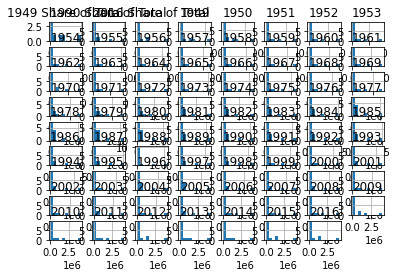

In [7]:
df.hist()

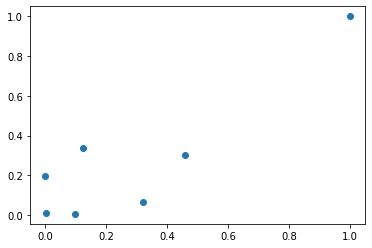

In [8]:
x1 = df['1949 Share of Total']
x2 = df['2016 Share of Total']
plt.scatter(x1,x2)
plt.show()

#Implementing K means


In [9]:
Y = df['Annual Electricity Net Generation (Million Kilowatthours)']
Y

0     Electricity Net Generation From Coal, All Sectors
1     Electricity Net Generation From Petroleum, All...
2     Electricity Net Generation From Natural Gas, A...
3     Electricity Net Generation From Other Gases, A...
4     Electricity Net Generation From Nuclear Electr...
5     Electricity Net Generation From Hydroelectric ...
6     Electricity Net Generation From Conventional H...
7     Electricity Net Generation From Wood, All Sectors
8     Electricity Net Generation From Waste, All Sec...
9     Electricity Net Generation From Geothermal, Al...
10    Electricity Net Generation From Solar, All Sec...
11    Electricity Net Generation From Wind, All Sectors
12        Electricity Net Generation Total, All Sectors
Name: Annual Electricity Net Generation (Million Kilowatthours), dtype: object

In [10]:
X=df.drop(['Annual Electricity Net Generation (Million Kilowatthours)'],axis=1)
X_f=X.fillna(value=0)
X_f

,1949 Share of Total,1990 Share of Total,2016 Share of Total,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,0.457414,0.524721,0.304043,135451.320,154519.994,185203.657,195436.666,218846.325,239145.966,301362.698,338503.484,346386.207,344365.781,378424.210,403067.357,421870.669,450249.238,493926.719,526230.019,570925.951,613474.800,630483.363,684904.580,706001.240,704394.479,713102.454,771131.265,847651.470,828432.921,852786.222,944390.993,985218.596,975742.083,1075037.091,1161562.368,1203203.232,1192004.204,1259424.279,1341680.752,1402128.125,1385831.452,1463781.289,1540652.774,1583779.139,1594011.479,1590622.748,1621206.039,1690070.232,1690693.864,1709426.468,1795195.593,1845015.736,1873515.690,1881087.224,1966264.596,1903955.942,1933130.354,1973736.752,1978300.549,2012873.046,1990511.135,2016455.584,1985801.247,1755904.253,1847290.279,1733430.005,1514042.945,1581114.716,1581710.350,1352398.197,1240089.066
1,0.096403,0.041629,0.005861,28547.232,33734.288,28712.116,29749.761,38404.449,31520.175,37138.308,35946.772,40499.357,40371.540,46839.719,47986.893,48519.376,48879.536,52001.610,56953.712,64801.224,78926.172,89270.724,104275.833,137847.152,184183.402,220225.423,274295.961,314342.926,300930.537,289094.900,319988.136,358178.822,365060.441,303525.209,245994.189,206420.775,146797.490,144498.593,119807.913,100202.273,136584.867,118492.571,148899.561,164358.520,126460.202,119751.573,100154.163,112788.180,105900.983,74554.065,81411.225,92554.873,128800.173,118060.838,111220.965,124880.221,94567.395,119405.643,121145.057,122225.017,64166.414,65738.978,46242.612,38936.515,37061.013,30182.245,23189.542,27164.444,30231.862,28248.749,23905.706
2,0.124835,0.122708,0.338417,36966.709,44559.159,56615.678,68453.088,79790.975,93688.271,95285.441,104037.208,114212.525,119759.302,146619.391,157969.787,169285.998,184301.293,201602.073,220038.479,221559.434,251151.562,264805.785,304432.723,333278.945,372890.063,374030.784,375747.796,340858.192,320065.088,299778.408,294623.911,305504.859,305390.836,329485.107,346239.900,345777.173,305259.749,274098.458,297393.596,291945.965,248508.433,272620.803,252800.704,352628.866,372765.154,381553.017,404074.372,414926.798,460218.682,496057.945,455055.576,479398.670,531257.104,556396.127,601038.159,639129.119,691005.744,649907.539,710100.017,760960.254,816440.770,896589.791,882980.599,920978.681,987697.234,1013688.929,1225894.175,1124835.560,1126608.958,1333482.110,1380293.217
3,0.000000,0.003418,0.003187,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7862.418,10382.830,11335.593,13270.237,12955.798,13319.051,13869.951,14355.813,13350.634,13492.230,14125.592,13954.758,9039.473,11462.684,15600.022,15252.431,13464.144,14176.808,13453.354,11706.876,10632.107,11312.787,11566.200,11897.585,12852.937,12021.786,13116.698,13000.050
4,0.000000,0.189893,0.197448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.670,164.691,188.101,518.182,1692.149,2269.685,3211.836,3342.743,3656.699,5519.909,7655.214,12528.419,13927.839,21804.448,38104.545,54091.135,83479.463,113975.740,172505.075,191103.531,250883.283,276403.070,255154.623,251115.575,272673.503,282773.248,293677.119,327633.549,383690.727,414038.063,455270.382,526973.047,529354.717,576861.678,612565.087,618776.263,610291.214,640439.832,673402.123,674728.546,628644.171,673702.104,728254.124,753892.940,768826.308,780064.087,763732.695,788528.387,781986.365,787218.636,806424.753,806208.435,798854.585,806968.301,790204.367,769331.249,789016.473,797165.982,797177.877,805327.221
5,0.000000,-0.0

In [11]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X_f) 
    kmeanModel.fit(X_f)     
      
    distortions.append(sum(np.min(cdist(X_f, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X_f.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X_f, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X_f.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 



In [12]:

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 


1 : 4371550.206898148
2 : 2094264.6243876156
3 : 1189175.0887686822
4 : 524008.7149928252
5 : 295212.05881133385
6 : 164296.3894729121
7 : 67165.87931682273
8 : 27405.073019583226
9 : 18204.068424836445


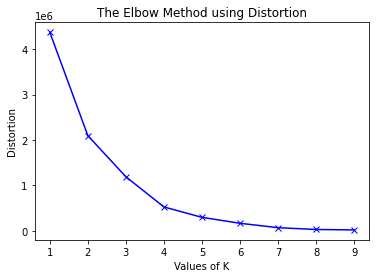

In [13]:

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


Taking value of k as 5

In [16]:
kmean = KMeans(n_clusters = 5,n_init=10,max_iter=300)
kmean.fit(X_f)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
y_predicted = kmean.fit_predict(X_f)
y_predicted

array([3, 2, 0, 4, 0, 4, 2, 4, 4, 4, 4, 4, 1], dtype=int32)

In [18]:
X_f['cluster'] = y_predicted
X_f.head()

,1949 Share of Total,1990 Share of Total,2016 Share of Total,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,cluster
0,0.457414,0.524721,0.304043,135451.320,154519.994,185203.657,195436.666,218846.325,239145.966,301362.698,338503.484,346386.207,344365.781,378424.210,403067.357,421870.669,450249.238,493926.719,526230.019,570925.951,613474.800,630483.363,684904.580,706001.240,704394.479,713102.454,771131.265,847651.470,828432.921,852786.222,944390.993,985218.596,975742.083,1075037.091,1161562.368,1203203.232,1192004.204,1259424.279,1341680.752,1402128.125,1385831.452,1463781.289,1540652.774,1583779.139,1594011.479,1590622.748,1621206.039,1690070.232,1690693.864,1709426.468,1795195.593,1845015.736,1873515.690,1881087.224,1966264.596,1903955.942,1933130.354,1973736.752,1978300.549,2012873.046,1990511.135,2016455.584,1985801.247,1755904.253,1847290.279,1733430.005,1514042.945,1581114.716,1581710.350,1352398.197,1240089.066,3
1,0.096403,0.041629,0.005861,28547.232,33734.288,28712.116,29749.761,38404.449,31520.175,37138.308,35946.772,40499.357,40371.540,46839.719,47986.893,48519.376,48879.536,52001.610,56953.712,64801.224,78926.172,89270.724,104275.833,137847.152,184183.402,220225.423,274295.961,314342.926,300930.537,289094.900,319988.136,358178.822,365060.441,303525.209,245994.189,206420.775,146797.490,144498.593,119807.913,100202.273,136584.867,118492.571,148899.561,164358.520,126460.202,119751.573,100154.163,112788.180,105900.983,74554.065,81411.225,92554.873,128800.173,118060.838,111220.965,124880.221,94567.395,119405.643,121145.057,122225.017,64166.414,65738.978,46242.612,38936.515,37061.013,30182.245,23189.542,27164.444,30231.862,28248.749,23905.706,2
2,0.124835,0.122708,0.338417,36966.709,44559.159,56615.678,68453.088,79790.975,93688.271,95285.441,104037.208,114212.525,119759.302,146619.391,157969.787,169285.998,184301.293,201602.073,220038.479,221559.434,251151.562,264805.785,304432.723,333278.945,372890.063,374030.784,375747.796,340858.192,320065.088,299778.408,294623.911,305504.859,305390.836,329485.107,346239.900,345777.173,305259.749,274098.458,297393.596,291945.965,248508.433,272620.803,252800.704,352628.866,372765.154,381553.017,404074.372,414926.798,460218.682,496057.945,455055.576,479398.670,531257.104,556396.127,601038.159,639129.119,691005.744,649907.539,710100.017,760960.254,816440.770,896589.791,882980.599,920978.681,987697.234,1013688.929,1225894.175,1124835.560,1126608.958,1333482.110,1380293.217,0
3,0.000000,0.003418,0.003187,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7862.418,10382.830,11335.593,13270.237,12955.798,13319.051,13869.951,14355.813,13350.634,13492.230,14125.592,13954.758,9039.473,11462.684,15600.022,15252.431,13464.144,14176.808,13453.354,11706.876,10632.107,11312.787,11566.200,11897.585,12852.937,12021.786,13116.698,13000.050,4
4,0.000000,0.189893,0.197448,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,9.670,164.691,188.101,518.182,1692.149,2269.685,3211.836,3342.743,3656.699,5519.909,7655.214,12528.419,13927.839,21804.448,38104.545,54091.135,83479.463,113975.740,172505.075,191103.531,250883.283,276403.070,255154.623,251115.575,272673.503,282773.248,293677.119,327633.549,383690.727,414038.063,455270.382,526973.047,529354.717,576861.678,612565.087,618776.263,610291.214,640439.832,673402.123,674728.546,628644.171,673702.104,728254.124,753892.940,768826.308,780064.087,763732.695,788528.387,781986.365,787218.636,806424.753,806208.435,798854.585,806968.301,790204.367,769331.249,789016.473,797165.982,797177.877,805327.221

In [19]:
kmean.inertia_

2417505347330.1143

In [20]:
kmean.cluster_centers_

array([[6.24175564e-02, 1.56300330e-01, 2.67932983e-01, 1.84833545e+04,
        2.22795795e+04, 2.83078390e+04, 3.42265440e+04, 3.98954875e+04,
        4.68441355e+04, 4.76427205e+04, 5.20186040e+04, 5.71110975e+04,
        5.99619965e+04, 7.34037460e+04, 7.92439845e+04, 8.54890735e+04,
        9.32854890e+04, 1.02406955e+05, 1.11690611e+05, 1.12608067e+05,
        1.28335735e+05, 1.36230499e+05, 1.58480571e+05, 1.73603392e+05,
        1.97347256e+05, 2.06067664e+05, 2.14919465e+05, 2.12168827e+05,
        2.17020414e+05, 2.36141742e+05, 2.42863721e+05, 2.78194071e+05,
        2.90896953e+05, 2.92319865e+05, 2.98677738e+05, 3.09225338e+05,
        2.94016498e+05, 2.83887789e+05, 3.12513573e+05, 3.37818346e+05,
        3.31273248e+05, 3.63945593e+05, 3.89886876e+05, 4.40991791e+05,
        4.74813416e+05, 4.97059052e+05, 5.11425318e+05, 5.12609006e+05,
        5.50329257e+05, 5.84730034e+05, 5.64892061e+05, 5.54021421e+05,
        6.02479604e+05, 6.42325125e+05, 6.77465549e+05, 7.039777

In [21]:
kmean.n_iter_

2

In [23]:
set(X_f['cluster'])

{0, 1, 2, 3, 4}

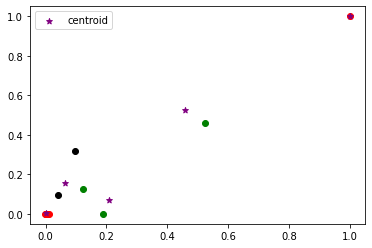

In [25]:
X= X_f

df0 = X[X.cluster==0]
df1 = X[X.cluster==1]
df2 = X[X.cluster==2]
df3 = X[X.cluster==3]
df4 = X[X.cluster==4]


plt.scatter(df0['1990 Share of Total'],df0['1949 Share of Total'],color='green')
plt.scatter(df1['1990 Share of Total'],df1['1949 Share of Total'],color='red')
plt.scatter(df2['1990 Share of Total'],df2['1949 Share of Total'],color='black')
plt.scatter(df3['1990 Share of Total'],df3['1949 Share of Total'],color='green')
plt.scatter(df4['1990 Share of Total'],df4['1949 Share of Total'],color='red')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
#plt.xlabel('Facility Name')
#plt.ylabel('KWH Generated')
plt.legend()